# Text Vectorization techniques
This colab document demostrates following steps in text processing:
1. Text Pre-Processing
    * Reading text files with different formats
    * Normalize
    * Tokenize
    * Stemming
    * Lemmatization
    * Case folding / Lowercasing
    * POS Tagging
    * NER
2. Vectorization
    * Count Vectorizer
    * TFIDF Vectorizer
    * Effects of n-grams to the vectors
    * Effects of min_df and max_df
3. Visualization
    * Plot tokens with t-sne
    * Similar vectors
4. Distributed Representations
    * Word2Vec
    * Plot tokens with t-sne
    * Similar vectors
5. Text Classification



## 1. Text Pre-Processing

In [ ]:
# Dataset representation
import pandas as pd

# String manipulations
import string
import re

# Text processing and NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag

In [ ]:
## Sentence tokenizer
 #Uncomment if running for the first time
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## 1.a Reading Data
- Read the dataset in an appropriate data structure

In [ ]:
# Data: https://appen.com/datasets/combined-disaster-response-data/
# df_csv = pd.read_csv("https://datasets.appen.com/appen_datasets/disaster_response_data/disaster_response_messages_training.csv", header = 0)
# df_csv.message.head(10)
url = "https://raw.githubusercontent.com/cameronbronstein/Project-4-New-Light-Technologies-Client-Project/master/datasets/disaster_response_messages_training.csv"
df_csv = pd.read_csv(url, header = 0)
df_csv.message.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


0    Weather update - a cold front from Cuba that c...
1              Is the Hurricane over or is it not over
2    says: west side of Haiti, rest of the country ...
3               Information about the National Palace-
4                       Storm at sacred heart of jesus
5    Please, we need tents and water. We are in Sil...
6      I would like to receive the messages, thank you
7    There's nothing to eat and water, we starving ...
8    I am in Petionville. I need more information r...
9    I am in Thomassin number 32, in the area named...
Name: message, dtype: object

In [ ]:
df_csv.columns

Index(['id', 'split', 'message', 'original', 'genre', 'related', 'PII',
       'request', 'offer', 'aid_related', 'medical_help', 'medical_products',
       'search_and_rescue', 'security', 'military', 'child_alone', 'water',
       'food', 'shelter', 'clothing', 'money', 'missing_people', 'refugees',
       'death', 'other_aid', 'infrastructure_related', 'transport',
       'buildings', 'electricity', 'tools', 'hospitals', 'shops',
       'aid_centers', 'other_infrastructure', 'weather_related', 'floods',
       'storm', 'fire', 'earthquake', 'cold', 'other_weather',
       'direct_report'],
      dtype='object')

In [ ]:
## Reading "json" file using pandas
# df_json = pd.read_json("https://raw.githubusercontent.com/HSLCY/ABSA-BERT-pair/master/data/sentihood/sentihood-train.json")
# df_json.head()

In [ ]:
d1 = list(df_csv.message)
dataset = d1[:10]
dataset

['Weather update - a cold front from Cuba that could pass over Haiti',
 'Is the Hurricane over or is it not over',
 'says: west side of Haiti, rest of the country today and tonight',
 'Information about the National Palace-',
 'Storm at sacred heart of jesus',
 'Please, we need tents and water. We are in Silo, Thank you!',
 'I would like to receive the messages, thank you',
 "There's nothing to eat and water, we starving and thirsty.",
 'I am in Petionville. I need more information regarding 4636',
 'I am in Thomassin number 32, in the area named Pyron. I would like to have some water. Thank God we are fine, but we desperately need water. Thanks']

## 1.b Preprocessing
- To preprocess your text simply means to bring your text into a form that is predictable and analyzable for your task. This may include lowercasing, stemming, lemmatization, stop-words removal etc. Tokenize the documents carefully to extract individual terms.

### Removing HTML Tags
- Datasets often contain tags when downloaded and hence its removal is paramount.

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    return TAG_RE.sub('', text)

def remove_tags2(text):
    # Using regular expressions to match html tags and replace them with ''
    updated = re.sub('<[^<]+?>', '', text)
    return updated

In [ ]:
s = "<p class='message'>Sky is blue.<\p>"
print(remove_tags(s))

Sky is blue.


In [ ]:
d1_string = ''
for i in range(len(dataset)):
    s = dataset[i]
    d1_string += (' ' + remove_tags(s))
print(d1_string)

 Weather update - a cold front from Cuba that could pass over Haiti Is the Hurricane over or is it not over says: west side of Haiti, rest of the country today and tonight Information about the National Palace- Storm at sacred heart of jesus Please, we need tents and water. We are in Silo, Thank you! I would like to receive the messages, thank you There's nothing to eat and water, we starving and thirsty. I am in Petionville. I need more information regarding 4636 I am in Thomassin number 32, in the area named Pyron. I would like to have some water. Thank God we are fine, but we desperately need water. Thanks


### Removing Punctuations
- Remove punctuations (i.e. ",", ".", "!", "\") from the text

In [ ]:
def remPunctuations(text):
    # table is a translation table for removing the punctuation marks from the words
    table = str.maketrans({key: None for key in string.punctuation})
    print(f"Translation Table: {table}")
    translated = text.translate(table)
    return translated

In [ ]:
print(dataset[9])
print(remPunctuations(dataset[9]))

I am in Thomassin number 32, in the area named Pyron. I would like to have some water. Thank God we are fine, but we desperately need water. Thanks
Translation Table: {33: None, 34: None, 35: None, 36: None, 37: None, 38: None, 39: None, 40: None, 41: None, 42: None, 43: None, 44: None, 45: None, 46: None, 47: None, 58: None, 59: None, 60: None, 61: None, 62: None, 63: None, 64: None, 91: None, 92: None, 93: None, 94: None, 95: None, 96: None, 123: None, 124: None, 125: None, 126: None}
I am in Thomassin number 32 in the area named Pyron I would like to have some water Thank God we are fine but we desperately need water Thanks


In [ ]:
d1_string = remPunctuations(d1_string)
print(d1_string)

Translation Table: {33: None, 34: None, 35: None, 36: None, 37: None, 38: None, 39: None, 40: None, 41: None, 42: None, 43: None, 44: None, 45: None, 46: None, 47: None, 58: None, 59: None, 60: None, 61: None, 62: None, 63: None, 64: None, 91: None, 92: None, 93: None, 94: None, 95: None, 96: None, 123: None, 124: None, 125: None, 126: None}
 Weather update  a cold front from Cuba that could pass over Haiti Is the Hurricane over or is it not over says west side of Haiti rest of the country today and tonight Information about the National Palace Storm at sacred heart of jesus Please we need tents and water We are in Silo Thank you I would like to receive the messages thank you Theres nothing to eat and water we starving and thirsty I am in Petionville I need more information regarding 4636 I am in Thomassin number 32 in the area named Pyron I would like to have some water Thank God we are fine but we desperately need water Thanks


### Tokenization

In [ ]:
# takes a string input and returns a list of tokens
#from nltk.tokenize import word_tokenize
def tokenize(text):
    return word_tokenize(text)

In [ ]:
d1_tokens = tokenize(d1_string)
d1_tokens[:10] # returns a list

['Weather',
 'update',
 'a',
 'cold',
 'front',
 'from',
 'Cuba',
 'that',
 'could',
 'pass']

### Stop-words removal

In [ ]:
# takes in a list of tokens and returns a list of tokens with stopwords removed
def remStop(tokens):
    stop_words = set(stopwords.words('english'))
    filtered = [t for t in tokens if not t in stop_words]
    return filtered

In [ ]:
d1_tokens = remStop(d1_tokens)
d1_tokens[:10] #still a list

['Weather',
 'update',
 'cold',
 'front',
 'Cuba',
 'could',
 'pass',
 'Haiti',
 'Is',
 'Hurricane']

### Stemming, Lemmatization & Lowercasing
- Functions for finding the stemmed word, the root and then to convert all the documents to lower case

In [ ]:
def lemmatize(tokens):
    lz = WordNetLemmatizer()
    lemmatized = [lz.lemmatize(t) for t in tokens]
    return list(set(lemmatized))

In [ ]:
lst = ["cars", "runs"]
print(lemmatize(lst))


['car', 'run']


In [ ]:
d1_lemmas = lemmatize(d1_tokens)
d1_lemmas[:10] #still a list which contains lemmas of the words in the dataset

['water',
 'Haiti',
 'today',
 'God',
 'fine',
 'heart',
 'I',
 'Thanks',
 'jesus',
 'could']

In [ ]:
def stem(tokens):
    ps = PorterStemmer()
    stemmed = [ps.stem(t) for t in tokens]
    return list(set(stemmed))

In [ ]:
d1_stems = stem(d1_tokens) #still a list of stemmed words which might not make sense
d1_stems[:10]

['water',
 'today',
 'pyron',
 'thirsti',
 'heart',
 'name',
 'fine',
 'cuba',
 'could',
 'pleas']

In [ ]:
def toLower(tokens):
    return [t.lower() for t in tokens]

In [ ]:
d1_lower = toLower(d1_lemmas)
d1_lower[:10]

['water',
 'haiti',
 'today',
 'god',
 'fine',
 'heart',
 'i',
 'thanks',
 'jesus',
 'could']

### POS Tagging


*   Function to Assign POS tags to each token
*   Pass tokens of a document as arguments to the given function,the returned value will have POS tags corresponding to each token in that document

In [ ]:
def POStagging(tokens):
    return nltk.pos_tag(tokens)

In [ ]:
d1_pos = POStagging(d1_tokens)
d1_pos[:10]

[('Weather', 'NNP'),
 ('update', 'JJ'),
 ('cold', 'NN'),
 ('front', 'NN'),
 ('Cuba', 'NNP'),
 ('could', 'MD'),
 ('pass', 'VB'),
 ('Haiti', 'NNP'),
 ('Is', 'NNP'),
 ('Hurricane', 'NNP')]

### Named Entity Recognition (NER)
(also known as entity identification, entity chunking and entity extraction)

**What is an entity?**

Named entity is any real-world object, such as persons, locations, organizations, products, etc., that can be denoted with a proper name. e.g., New York City is an instance of a Place.

**Use cases:**

*   Creating related tags or linking to relevant topics
*   Context understanding in search, recommendations




---



Using another useful NLP library called **[Spacy](https://spacy.io/usage)**.

In [ ]:
import spacy
print("\n\nSpacy with version=={} imported.".format(spacy.__version__))



Spacy with version==3.4.3 imported.


**Language Model for Spacy:**
A language model is the context provider for a particular language. It contains informations such as how the words are related and which one's are tags, entity, etc.

In [ ]:
# Download the language model for spacy
#!python -m spacy download en_core_web_sm
spacy_model = spacy.load("en_core_web_sm")
print("\n\nSpacy model imported at: {}".format(spacy_model))



Spacy model imported at: <spacy.lang.en.English object at 0x7fa2cdf7b410>


In [ ]:
doc1 = spacy_model(u"Apple Inc is looking at buying U.K. startup for $1 billion.")
for ent in doc1.ents:
    print("Token [{}] -> Entity type [{}] indices [{}] - [{}].".format(ent.text, ent.label_, ent.start_char, ent.end_char))

Token [Apple Inc] -> Entity type [ORG] indices [0] - [9].
Token [U.K.] -> Entity type [GPE] indices [31] - [35].
Token [$1 billion] -> Entity type [MONEY] indices [48] - [58].


In [ ]:
# Filtering sentences
doc2 = spacy_model(u"""In the expression named entity, the word named restricts
                   the task to those entities for which one or many strings,
                   such as words or phrases, stands (fairly) consistently for
                   some referent. This is closely related to rigid designators,
                   as defined by Kripke[3][4], although in practice NER deals
                   with many names and referents that are not philosophically
                   'rigid'. For instance, the automotive company created by
                   Henry Ford in 1903 can be referred to as Ford or Ford Motor
                   Company, although 'Ford' can refer to many other entities as
                   well (see Ford). Rigid designators include proper names as
                   well as terms for certain biological species and substances,
                   but exclude pronouns (such as 'it'; see coreference
                   resolution), descriptions that pick out a referent by its
                   properties (see also De dicto and de re), and names for kinds
                   of things as opposed to individuals (for example 'Bank').""")
sentences = list(doc2.sents)
print("This is the first sentence: [{}]".format(sentences [0]))
sentences

This is the first sentence: [In the expression named entity, the word named restricts
                   the task to those entities for which one or many strings,
                   such as words or phrases, stands (fairly) consistently for
                   some referent.]


[In the expression named entity, the word named restricts
                    the task to those entities for which one or many strings,
                    such as words or phrases, stands (fairly) consistently for
                    some referent.,
 This is closely related to rigid designators,
                    as defined by Kripke[3][4], although in practice NER deals
                    with many names and referents that are not philosophically
                    'rigid'.,
 For instance, the automotive company created by
                    Henry Ford in 1903 can be referred to as Ford or Ford Motor
                    Company, although 'Ford' can refer to many other entities as
                    well (see Ford).,
 Rigid designators include proper names as
                    well as terms for certain biological species and substances,
                    but exclude pronouns (such as 'it'; see coreference 
                    resolution), descriptions that pick out a referen

In [ ]:
def filtering_ner(sentences):
    for each_sent in sentences:
        print("-----------")
        print(each_sent)
        for ent in each_sent.ents:
            print("Token [{}] -> Entity type [{}] indices [{}] - [{}].".format(ent.text, ent.label_, ent.start_char, ent.end_char))
filtering_ner(sentences)

-----------
In the expression named entity, the word named restricts
                   the task to those entities for which one or many strings,
                   such as words or phrases, stands (fairly) consistently for
                   some referent.
Token [one] -> Entity type [CARDINAL] indices [113] - [116].
-----------
This is closely related to rigid designators,
                   as defined by Kripke[3][4], although in practice NER deals
                   with many names and referents that are not philosophically
                   'rigid'.
Token [NER] -> Entity type [ORG] indices [360] - [363].
-----------
For instance, the automotive company created by
                   Henry Ford in 1903 can be referred to as Ford or Ford Motor
                   Company, although 'Ford' can refer to many other entities as
                   well (see Ford).
Token [Henry Ford] -> Entity type [PERSON] indices [543] - [553].
Token [1903] -> Entity type [DATE] indices [557] - [561].
Toke

## 2. Vectorization

### 2.a Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.toarray())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


### 2.b TF-IDF
TF-IDF is an information retrieval technique that weighs a term’s frequency (TF) and its inverse document frequency (IDF). Each word or term has its respective TF and IDF score. The product of the TF and IDF scores of a term is called the TF*IDF weight of that term.
Put simply, the higher the TF*IDF score (weight), the rarer the term and vice versa.

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.toarray())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]


In [ ]:
print(dataset)

['Weather update - a cold front from Cuba that could pass over Haiti', 'Is the Hurricane over or is it not over', 'says: west side of Haiti, rest of the country today and tonight', 'Information about the National Palace-', 'Storm at sacred heart of jesus', 'Please, we need tents and water. We are in Silo, Thank you!', 'I would like to receive the messages, thank you', "There's nothing to eat and water, we starving and thirsty.", 'I am in Petionville. I need more information regarding 4636', 'I am in Thomassin number 32, in the area named Pyron. I would like to have some water. Thank God we are fine, but we desperately need water. Thanks']


In [ ]:
stop_words = set(stopwords.words('english'))
c_vectorizer = CountVectorizer(stop_words=stop_words,lowercase = True)
Count_Vectors = c_vectorizer.fit_transform(dataset)
Count_Vectors.shape

(10, 50)

In [ ]:
print(c_vectorizer.get_feature_names_out())

['32' '4636' 'area' 'cold' 'could' 'country' 'cuba' 'desperately' 'eat'
 'fine' 'front' 'god' 'haiti' 'heart' 'hurricane' 'information' 'jesus'
 'like' 'messages' 'named' 'national' 'need' 'nothing' 'number' 'palace'
 'pass' 'petionville' 'please' 'pyron' 'receive' 'regarding' 'rest'
 'sacred' 'says' 'side' 'silo' 'starving' 'storm' 'tents' 'thank' 'thanks'
 'thirsty' 'thomassin' 'today' 'tonight' 'update' 'water' 'weather' 'west'
 'would']


In [ ]:
first_freq_vector = Count_Vectors[0]
# place cont vector values in a pandas data frame
df = pd.DataFrame(first_freq_vector.T.todense(), index=c_vectorizer.get_feature_names_out(), columns=["count"])
df.sort_values(by=["count"],ascending=False)

,count
pass,1
weather,1
haiti,1
front,1
cuba,1
update,1
could,1
cold,1
rest,0
tents,0


In [ ]:
c_vectorizer_alt = CountVectorizer(
    stop_words=stop_words,
    lowercase = True,
    ngram_range=(1,2),
    min_df=2,
    max_df=0.80,
    max_features=30,
    tokenizer=word_tokenize)

Count_Vectors_alt = c_vectorizer_alt.fit_transform(dataset)
print(Count_Vectors_alt.shape)
c_vectorizer_alt.get_feature_names_out()

(10, 12)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  % sorted(inconsistent)


array([',', ', thank', '.', 'haiti', 'information', 'like', 'need',
       'thank', 'water', 'water .', 'would', 'would like'], dtype=object)

In [ ]:
stop_words = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(stop_words=stop_words,lowercase = True)
Doc_TFIDF_Vector = vectorizer.fit_transform(dataset)

In [ ]:
#Shape of the Document Vector
print("Shape of the TF-IDF Vector is:",Doc_TFIDF_Vector[0].shape)

Shape of the TF-IDF Vector is: (1, 50)


In [ ]:
print(Doc_TFIDF_Vector)

  (0, 12)	0.3059019717539992
  (0, 25)	0.3598459955665589
  (0, 4)	0.3598459955665589
  (0, 6)	0.3598459955665589
  (0, 10)	0.3598459955665589
  (0, 3)	0.3598459955665589
  (0, 45)	0.3598459955665589
  (0, 47)	0.3598459955665589
  (1, 14)	1.0
  (2, 44)	0.3598459955665589
  (2, 43)	0.3598459955665589
  (2, 5)	0.3598459955665589
  (2, 31)	0.3598459955665589
  (2, 34)	0.3598459955665589
  (2, 48)	0.3598459955665589
  (2, 33)	0.3598459955665589
  (2, 12)	0.3059019717539992
  (3, 24)	0.6060433187339399
  (3, 20)	0.6060433187339399
  (3, 15)	0.5151921890284284
  (4, 16)	0.5
  (4, 13)	0.5
  (4, 32)	0.5
  (4, 37)	0.5
  (5, 39)	0.344548189882523
  :	:
  (7, 41)	0.4686458822988574
  (7, 36)	0.4686458822988574
  (7, 8)	0.4686458822988574
  (7, 22)	0.4686458822988574
  (7, 46)	0.348545761726207
  (8, 1)	0.4836062152711379
  (8, 30)	0.4836062152711379
  (8, 26)	0.4836062152711379
  (8, 21)	0.3596722024962039
  (8, 15)	0.4111094652339048
  (9, 40)	0.26025335409453165
  (9, 7)	0.26025335409453165
  (

#### Visualizing TF-IDF Vector of the first document

In [ ]:
# import pandas as pd
first_doc_vector = Doc_TFIDF_Vector[3]
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_doc_vector.T.todense(), index=vectorizer.get_feature_names_out(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
palace,0.606043
national,0.606043
information,0.515192
32,0.000000
please,0.000000
receive,0.000000
regarding,0.000000
rest,0.000000
sacred,0.000000
says,0.000000


### Find similar documents
Given a list of documents, find k most similar documents to it using TF-IDF vectors

In [ ]:
# query_doc = pd.read_csv("https://datasets.appen.com/appen_datasets/disaster_response_data/disaster_response_messages_test.csv")
# query_doc.head()
query_url = "https://raw.githubusercontent.com/cameronbronstein/Project-4-New-Light-Technologies-Client-Project/master/datasets/disaster_response_messages_test.csv"
query_doc = pd.read_csv(query_url)
queries = query_doc.message[:10].to_list()
queries

['UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.',
 'We are at Gressier we needs assistance right away. ASAP, Come help us.',
 'Delmas 33 in Silo, need water.',
 'SOS SOS, please provide police officers on the streets as they are very insecure',
 'I am a driver, a mechanic ,. I want to help',
 'We are at Fort Mercredi ( wednesday ) where can we find tents and treated water.',
 'Our imcomprehensibley of 9 member was repatriated incomprehensible - (Location) Duvivier, Fond Grango',
 'A cold front is on Cuba this morning. It could cross Haiti tomorrow. Isolated rain showers are expected for our region.',
 'Please Bo Gravel Vob Ta A 41 we are hungry. Need food.',
 'We are not located in one place, and i want you to know there is a lot of available spaces to put up tent for shelters  is the reason why we station in front of our house for more safety against thief, as you see.']

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity

In [ ]:
stop_words = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(stop_words=stop_words,lowercase = True)
Doc_TFIDF_Vector2 = vectorizer.fit_transform(queries)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(Doc_TFIDF_Vector2, Doc_TFIDF_Vector2)
print(cosine_sim)

[[1.         0.06971633 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.06971633 1.         0.         0.         0.13397051 0.
  0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.13219339
  0.         0.         0.11794304 0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.07975005 0.        ]
 [0.         0.13397051 0.         0.         1.         0.
  0.         0.         0.         0.09321325]
 [0.         0.         0.13219339 0.         0.         1.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.04850684]
 [0.         0.         0.11794304 0.07975005 0.         0.
  0.         0.         1.         0.        ]
 [0.         0.         0.   

## 3. Visualization
Use t-sne to project vectors into 2 dimensions and plot

In [ ]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [ ]:
def plot_features_tsne(X, tokens: list = None):
    """ Plots TSNE representations of tokens and their embeddings.

    :param X: N x D
    :param tokens: N
    :param limit_view:
    """
    tsne = TSNE(n_components=2, random_state=0, perplexity=3)

    X_2d = tsne.fit_transform(X)
    print(X_2d.shape, len(tokens))
    colors = range(X_2d.shape[0])

    plt.figure(figsize=(6, 5))
    if tokens is not None:
        for i, token in enumerate(tokens):
            plt.annotate(token, xy=(X_2d[i, 0], X_2d[i, 1]), zorder=1)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=colors, s=60, alpha=.5)
    plt.title('TSNE visualization of input vectors in 2D')
    # plt.xlabel('x-axis')
    # plt.ylabel('y-axis')
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(10, 2) 10


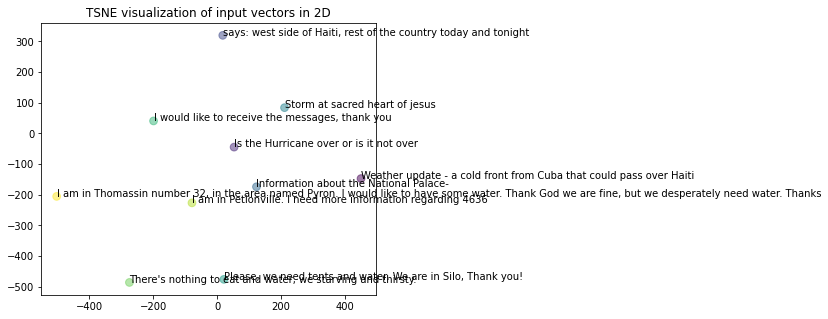

In [ ]:
plot_features_tsne(Count_Vectors, tokens = dataset)

(10, 2) 10


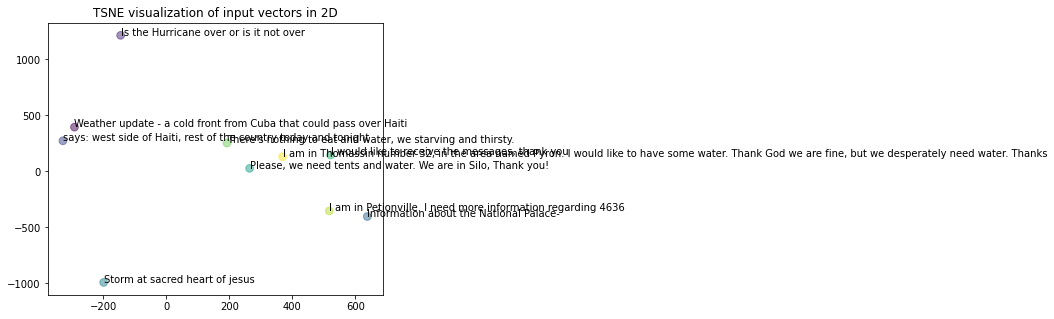

In [ ]:
plot_features_tsne(Doc_TFIDF_Vector, tokens = dataset)

In [ ]:
Count_Vectors.todense()

matrix([[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 1, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 1, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
         0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

## 4. Distributed Representation

### Word2Vec

The idea behind Word2Vec is pretty simple. We’re making an assumption that the **meaning of a word can be inferred by the company it keeps**. This is analogous to the saying, “*show me your friends, and I’ll tell who you are*”. For example, the words shocked, appalled and astonished are usually used in a similar context.

In this hands-on session, you will learn how to use the [**Gensim**](https://radimrehurek.com/gensim/) implementation of Word2Vec (in python) and actually get it to work.

## Training the Word2Vec model

To train a Word2Vec model you need to pass all the documents. So, we are essentially passing a list of strings where each string within the main list contains the document. Gensim implementation needs vocabulary. And by vocabulary, I mean a set of unique words.

After building the vocabulary, we just need to call `train(...)`

*Behind the scenes*, we are actually training a **neural network with a single hidden layer**. But, we are actually not going to use the neural network after training. Instead, the goal is to learn the weights of the hidden layer. These weights are essentially the word vectors that we’re trying to learn.

In [ ]:
from gensim.models import Word2Vec

sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, size = 20, window = 5, min_count=1)

## Understanding the parameters

Reference: https://radimrehurek.com/gensim/models/word2vec.html

> **vector_size**: The size of the dense vector to represent each token (here word). If you have very limited data, then size should be a much smaller value. If you have lots of data, its good to experiment with various sizes. The standard size is usually `300`.

> **window**: The maximum distance between the target word and its neighboring words when considering context. If your neighbor's position is greater than the maximum window width to the left and the right, then, some neighbors are not considered as being related to the target word. In theory, a smaller window should give you terms that are more related. If you have lots of data, then the window size should not matter much, as long as its a decent sized window.

> **min_count**: Minimium frequency count of words. The model would ignore words that do not statisfy the min_count. Extremely infrequent words are usually unimportant, so its best to get rid of those. Unless your dataset is really tiny, this does not really affect the model.

> **workers**: How many threads to use behind the scenes?

**Note:** You can experiment with these parameter values. Specially experiment with `size` parameter.

### Now, let's look at some outputs of our trained model

1.   This first example shows a simple case of generating a vector for a token which is present in the vocabulary.
2.   Secondly we will look up words similar to a word in the corpus. All we need to do here is to call the `most_similar()` function and provide the word as the positive example. This returns the top 10 similar words.

In [ ]:
word_vectors = model.wv
words = list(model.wv.index_to_key)
print(words)
print(word_vectors['this'])

AttributeError: ignored

In [ ]:
w1 = "sentence"
model.wv.most_similar(positive=w1)

[('for', 0.31441178917884827),
 ('the', 0.2851158082485199),
 ('one', 0.2125067412853241),
 ('and', 0.13708429038524628),
 ('this', 0.0634816586971283),
 ('is', -0.009840283542871475),
 ('second', -0.09837579727172852),
 ('word2vec', -0.10951593518257141),
 ('yet', -0.1684022843837738),
 ('final', -0.21255894005298615)]

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

X = []
for w in words:
    X.append(word_vectors[w])
X = np.array(X)
print(X.shape)

pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
#words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

NameError: ignored

### Similarity between two words in the vocabulary
Use the Word2Vec model to return the similarity between two words that are present in the vocabulary. There are many similarity measurement metric, one of them is `cosine_similarity` which is used by Gensim internally.

Contextually related words should have higher similarity score and vice versa.

**Exercise:** Check what happens if two words should be close according to you.

In [ ]:
model.wv.similarity(w1="second", w2="sentence")

NameError: ignored

In [ ]:
#Save Model
model.save("word2vec.model")

#Load Model
model = Word2Vec.load("word2vec.model")

### Exercise:
Try changing the size parameter and analyze it's effects in similarity score and other functions.

In [ ]:
# Hint: redefine the model with appropriate parameters and train:
word_vector_size = 50
w2v_model_new = Word2Vec(sentences, vector_size=word_vector_size, window=10, min_count=1, workers=10)
# w2v_model_new.train(documents, total_examples=len(documents), epochs=10)
print("Redefined training complete with [word_vector_size] = {}."
      .format(word_vector_size))

NameError: ignored

**Q: Compare the similarity values of two models**


In [ ]:

## Your code here to compare 2 models based on word similarity and other attributes:

## Add any number of code blocks you deem necessary.


### Importing a pre-trained models

Reference: https://radimrehurek.com/gensim/models/word2vec.html

In [ ]:
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
glove_vectors = gensim.downloader.load('glove-twitter-25')

In [ ]:
glove_vectors.most_similar('twitter')

[('facebook', 0.948005199432373),
 ('tweet', 0.9403423070907593),
 ('fb', 0.9342359900474548),
 ('instagram', 0.9104824066162109),
 ('chat', 0.8964963555335999),
 ('hashtag', 0.8885936737060547),
 ('tweets', 0.8878158330917358),
 ('tl', 0.8778461217880249),
 ('link', 0.877821147441864),
 ('internet', 0.8753897547721863)]

In [ ]:
w1 = "sentence"
glove_vectors.most_similar(positive=w1)

[('plot', 0.9004027843475342),
 ('evidence', 0.8979405760765076),
 ('spelling', 0.8934083580970764),
 ('sentences', 0.8700981736183167),
 ('false', 0.867972731590271),
 ('argument', 0.863446831703186),
 ('response', 0.8596455454826355),
 ('mistake', 0.8539903163909912),
 ('nonsense', 0.8459494709968567),
 ('letter', 0.8452234864234924)]

In [ ]:
glove_vectors.most_similar(positive=['king', 'woman'], negative=['man'], topn=5)

[('meets', 0.8841923475265503),
 ('prince', 0.832163393497467),
 ('queen', 0.8257461190223694),
 ('’s', 0.8174097537994385),
 ('crow', 0.813499391078949)]

### Vectorize a sentence/text using Word2Vec vectors

In [ ]:
vocab = list(glove_vectors.index_to_key)
txt = "this is a wonderful day."
tokens = tokenize(txt.lower())
#Replace unknown token by unk or some other token
tokens = [tok if tok in vocab else 'unk' for tok in tokens]
print(tokens)

['this', 'is', 'a', 'wonderful', 'day', '.']


In [ ]:
emb = glove_vectors[tokens]
print(emb.shape)
sent_vector = np.mean(emb, axis=0)
print(sent_vector.shape)
print(sent_vector)

(6, 25)
(25,)
[-2.9703000e-01 -2.3501297e-02  6.9806674e-03 -4.4920173e-02
  3.3886647e-03  1.6265599e-01  1.4551970e+00  4.8615003e-01
 -6.8439001e-01 -2.6545668e-01 -2.3812501e-01 -3.4054980e-02
 -4.8202667e+00  3.3895168e-01  2.1106815e-01 -1.8316500e-01
  9.3369663e-02 -4.3071661e-02 -5.8244830e-01 -8.6622335e-02
 -2.2096783e-01 -8.7960340e-02 -2.6976499e-01  2.9885635e-01
  4.7841337e-02]


In [ ]:
glove_vectors[['unk', 'this']]

array([[-0.73777 ,  1.2135  , -0.12689 ,  0.24241 , -0.40497 ,  0.14783 ,
        -0.90617 ,  0.15438 ,  1.0792  , -0.2793  , -1.1988  ,  1.2473  ,
        -1.0636  ,  0.029972,  0.22696 , -0.51281 , -0.052361, -0.091889,
         0.34847 ,  0.34467 ,  0.68067 ,  0.15576 ,  0.050702, -0.083678,
        -0.80964 ],
       [-0.17895 ,  0.38406 ,  0.073035, -0.32363 , -0.092441, -0.40767 ,
         2.1     , -0.11363 , -0.58784 , -0.17034 , -0.6433  ,  0.72388 ,
        -5.7839  , -0.10406 ,  0.52152 , -0.11314 ,  0.59554 , -0.47587 ,
        -0.4551  ,  0.084431, -0.4582  , -0.16727 ,  0.54594 ,  0.035478,
        -0.16073 ]], dtype=float32)

### Exercise:
Vectorize each sentences of "dataset" and find the most similar sentences of the first one.

In [ ]:
vocab = list(glove_vectors.index_to_key)

def get_text_encoding(txt):
    tokens = tokenize(txt.lower())
    tokens = [tok if tok in vocab else 'unk' for tok in tokens]
    emb = glove_vectors[tokens]
    sent_vector = np.mean(emb, axis=0)
    return sent_vector

NameError: ignored

In [ ]:
query_vector = get_text_encoding(dataset[0])
vec = get_text_encoding(dataset[1])

best_text = ""
c_max = 0
for i in range(1, len(dataset)):
    vec = get_text_encoding(dataset[i])
    c = np.dot(query_vector, vec)
    if(c>c_max):
        c_max = c
        best_text = dataset[i]

print(f"Query text :: {dataset[0]}")
print(f"Most similar text :: {best_text}")

Query text :: Weather update - a cold front from Cuba that could pass over Haiti
Most similar text :: Is the Hurricane over or is it not over


## 5. Text Classification
Dataset: https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

In [ ]:
import urllib.request
import zipfile
import os

#Download data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'
filename = 'data.zip'
urllib.request.urlretrieve(url, filename)

#Extract data
with zipfile.ZipFile(filename,"r") as zip_ref:
    zip_ref.extractall("data")

In [ ]:
filename = os.path.join("data", "SMSSpamCollection")
lines = []
with open(filename, 'r') as f:
    lines = f.readlines()

In [ ]:
#Prepare dataset
max_len = 500
X = np.zeros((max_len,25))
y = []

for i in range(max_len):
    arr = lines[i].split("\t")
    label = 1 if arr[0]=="spam" else 0
    sent_vector = get_text_encoding(arr[1])
    X[i] = sent_vector
    y.append(label)
print(X.shape)

(500, 25)


In [ ]:
#Training Model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(len(y_train))
print(X_test.shape)
print(len(y_test))

(350, 25)
350
(150, 25)
150


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_train)
print("Training Accuracy")
print(classification_report(y_train, y_pred))

Training Accuracy
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       297
           1       0.88      0.72      0.79        53

    accuracy                           0.94       350
   macro avg       0.92      0.85      0.88       350
weighted avg       0.94      0.94      0.94       350



In [ ]:
y_pred2 = clf.predict(X_test)
print("Test Accuracy")
print(classification_report(y_test, y_pred2))

Test Accuracy
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       132
           1       0.83      0.56      0.67        18

    accuracy                           0.93       150
   macro avg       0.89      0.77      0.81       150
weighted avg       0.93      0.93      0.93       150

